In [1]:
import json
import cv2
import numpy as np
import os

# Process images

In [2]:
#Enhance contrast using CLAHE or Histogram Equalization.
def enhance_contrast(image, method="clahe"):
    if method == "hist_eq":
        return cv2.equalizeHist(image)
    elif method == "clahe":
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        return clahe.apply(image)
    else:
        raise ValueError("Invalid method. Use 'hist_eq' or 'clahe'.")

#Preprocess images: enhance contrast, resize, normalize, and save as .npy.
def preprocess_images(image_dir, output_dir, target_size=(512, 512), contrast_method="clahe"):    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for image_file in os.listdir(image_dir):
        if image_file.endswith('.jpg') or image_file.endswith('.png'):
            # Load the image in grayscale
            image_path = os.path.join(image_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Skipping {image_file}: Unable to load.")
                continue

            # Enhance contrast
            image = enhance_contrast(image, method=contrast_method)
            
            # Resize the image
            image = cv2.resize(image, target_size)
            
            # Normalize the image (scale pixel values to [0, 1])
            image = image / 255.0
            
            # Save the preprocessed image as a .npy file
            np.save(os.path.join(output_dir, image_file.replace('.jpg', '.npy').replace('.png', '.npy')), image)


preprocess_images('C:/ML_Data/0_data_new_train/image', 'C:/ML_Data/0_data_new_train/image_preprocess', contrast_method="clahe")


# Display processed image

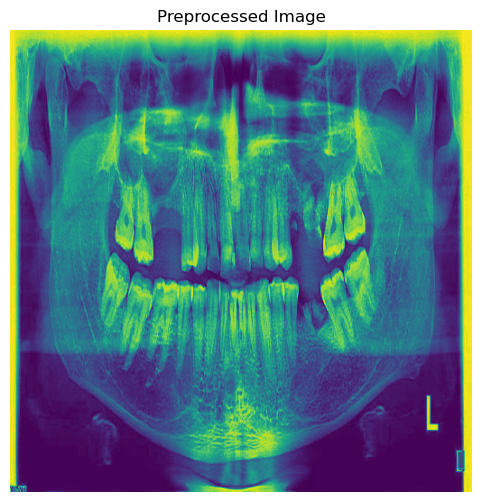

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed image from .npy file
image_path = "C:/ML_Data/0_data_new_train/image_preprocess/0844.npy"  
image = np.load(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Since it's RGB, no need for cmap='gray'
plt.axis("off")  # Hide axes
plt.title("Preprocessed Image")
plt.show()

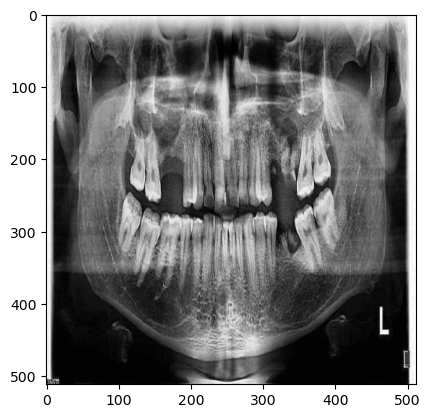

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_npy(npy_file_path):
    image_array = np.load(npy_file_path)
    plt.imshow(image_array, cmap='gray')
    plt.show()

# Example usage
visualize_npy('C:/ML_Data/0_data_new_train/image_preprocess/0844.npy') 

# Process annotation file

In [4]:
def create_mask_from_json(json_file, image_shape, target_size=(512, 512)):
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Initialize an empty mask
    mask = np.zeros(image_shape, dtype=np.uint8)
    
    # Extract only "bone_level_boundary"
    for shape in data['shapes']:
        if shape['label'] == 'bone_level_boundary':  
            points = np.array(shape['points'], dtype=np.int32)
            cv2.fillPoly(mask, [points], 255)  # Use 255 for clear binary segmentation
    
    # Resize the mask to match the target size
    mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)  # Use nearest-neighbor for masks
    
    return mask

def prepare_masks(json_dir, output_dir, target_size=(512, 512)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for json_file in os.listdir(json_dir):
        if json_file.endswith('.json'):
            # Load the corresponding image to get its shape
            image_file = json_file.replace('.json', '.jpg')
            image_path = os.path.join('C:/ML_Data/0_data_new_train/image', image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if image is None:
                print(f"Skipping {json_file}: Corresponding image not found.")
                continue
            
            # Create the mask
            mask = create_mask_from_json(os.path.join(json_dir, json_file), image.shape, target_size)
            
            # Save the mask as a .npy file
            np.save(os.path.join(output_dir, json_file.replace('.json', '.npy')), mask)

prepare_masks('C:/ML_Data/0_data_new_train/label', 'C:/ML_Data/0_data_new_train/label_preprocess') 




# Display processed image

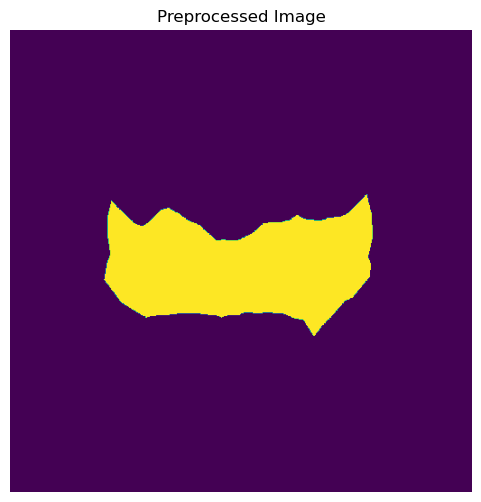

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed image from .npy file
image_path = "C:/ML_Data/0_data_new_train/label_preprocess/0844.npy" 
image = np.load(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Since it's RGB, no need for cmap='gray'
plt.axis("off")  # Hide axes
plt.title("Preprocessed Image")
plt.show()

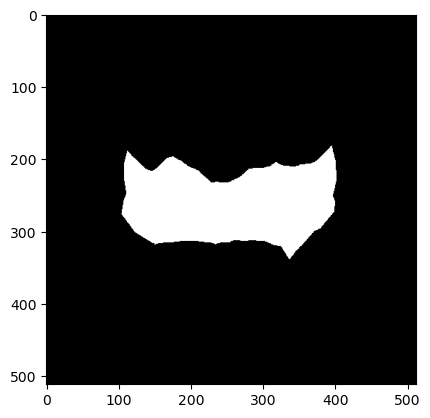

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_npy(npy_file_path):
    image_array = np.load(npy_file_path)
    plt.imshow(image_array, cmap='gray')
    plt.show()

# Example usage
visualize_npy('C:/ML_Data/0_data_new_train/label_preprocess/0844.npy') 